In [1]:
# Group number 1
# 
# Team members: Stepan Perminov, Polina Ponomareva, Kirill Shcherbakov, Daniil Svirskiy

# Library importing
import numpy as np
import matplotlib.pyplot as plt

# Size of the trajectory
n = 300

# Initialization of arrays
X = np.zeros((n,1))
z = np.zeros((n,1))

# Initial condition of the true trajectory X
X[0] = 10

# Variances
sigma_w2 = 28.0**2
sigma_et2 = 97.0**2

# Generation of normally distributed random noises with zero mathematical expectation and corresponding variances
w = np.random.normal(0, np.sqrt(sigma_w2), n-1)
et = np.random.normal(0, np.sqrt(sigma_et2), n)

# Generation of true trajectory X
for i in range(len(X)-1):
    X[i+1] = X[i] + w[i]

# Generation of measurements z of the process X
for i in range(len(z)):
    z[i] = X[i] + et[i]

In [2]:
# Determination of optimal smoothing coefficient in exponential smoothing
khi = sigma_w2 / sigma_et2
alfa = (-khi + np.sqrt(khi**2 + 4*khi)) / 2

# Determination of the window size M
M = (2 - alfa) / alfa

print(khi)
print(alfa)
print(M)

0.083324476565
0.249988612331
7.000364422


In [3]:
# Running mean application
run_mean = np.zeros((n,1))

# First 3 and last 3 measurements are replaced by corresponding average values
beg_mean = np.sum(z[:3])/len(z[:3])
end_mean = np.sum(z[len(z)-3:])/len(z[len(z)-3:])

# Running mean calculation
for i in range(len(z)):
    if i <= 2:
        run_mean[i] = beg_mean
    elif i >= len(z)-3:
        run_mean[i] = end_mean
    else:
        run_mean[i] = np.sum(z[i-3:i+4])/len(z[i-3:i+4])
   

In [4]:
# Exponential forward mean application
sm = np.zeros((n,1))
sm[0] = z[0]

for i in range(1,len(z)):
    sm[i] = sm[i-1] + alfa*(z[i] - sm[i-1])

In [5]:
# Exponential backward mean application
sm_b = np.zeros((n,1))
sm_b[-1] = sm[-1]

for i in reversed(range(len(sm)-1)):
    sm_b[i] = sm_b[i+1] + alfa*(sm[i] - sm_b[i+1])

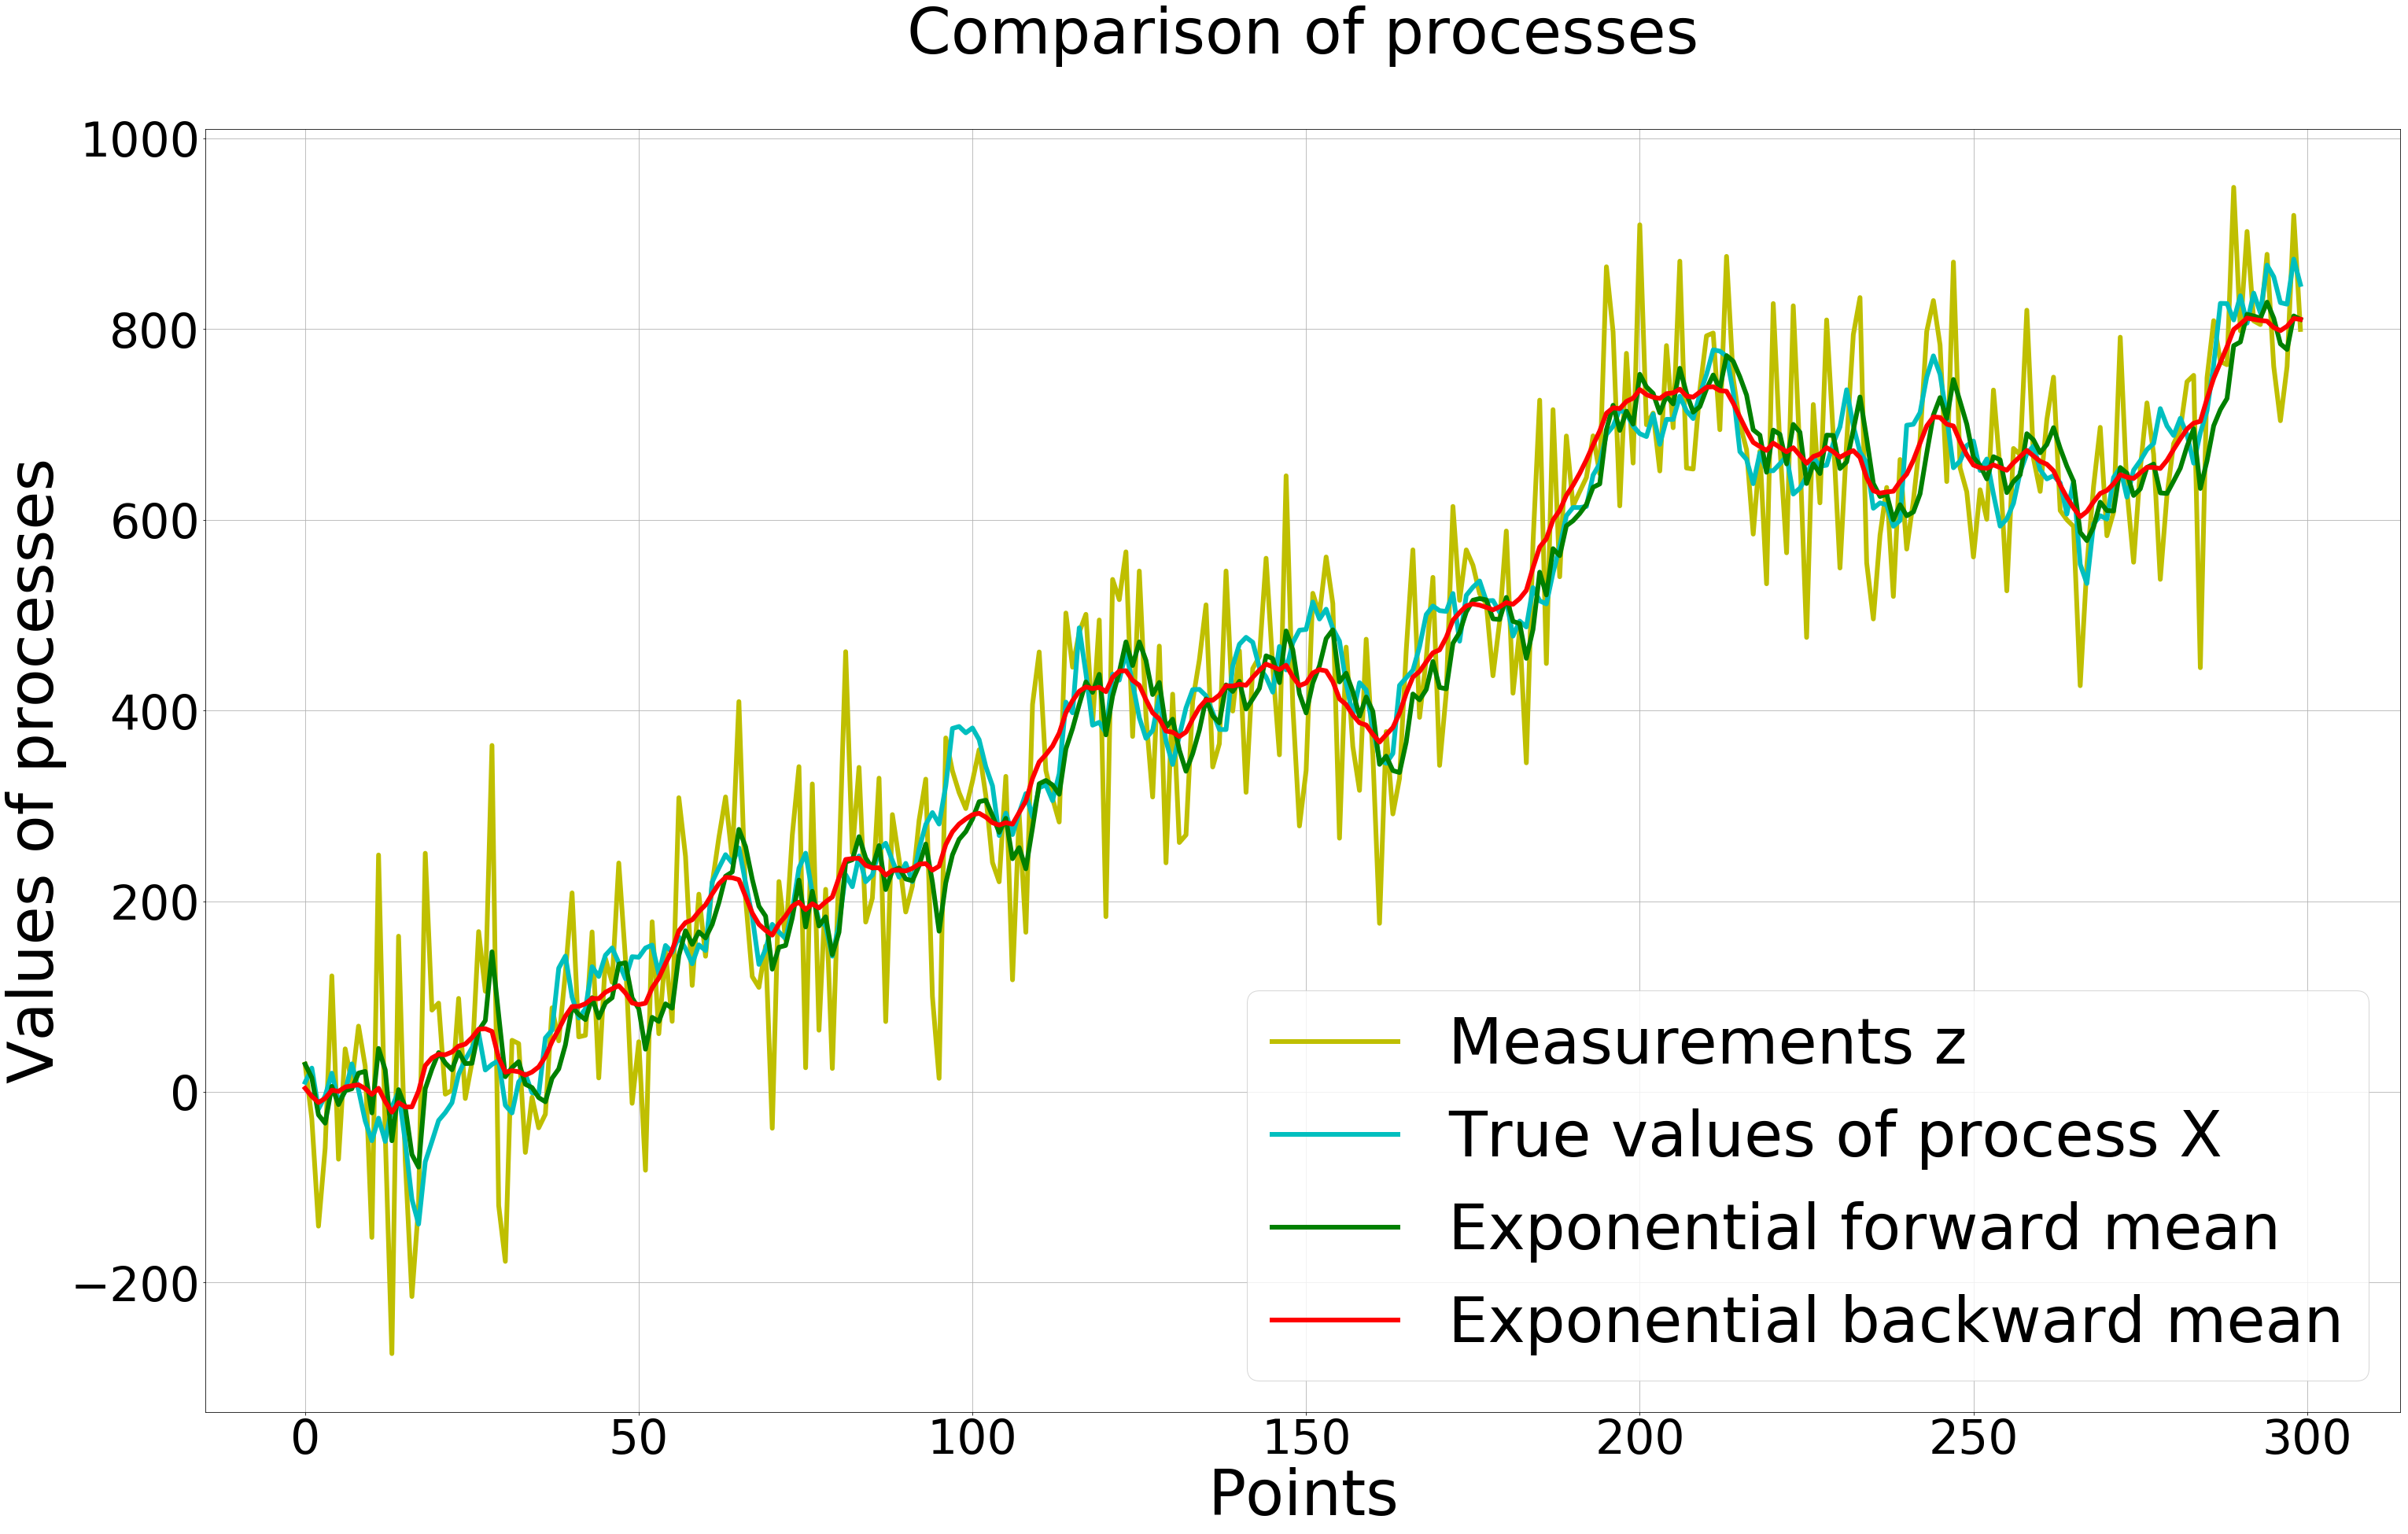

In [11]:
# Plotting of measurements, true values of process, running mean and exponential mean
plt.plot(z, linewidth = 6, label = "Measurements z", color = "y")
plt.plot(X, linewidth = 6, label = "True values of process X", color = "c")
plt.plot(sm, linewidth = 6, label = "Exponential forward mean", color = "g")
plt.plot(sm_b, linewidth = 6, label = "Exponential backward mean", color = "r")
#plt.plot(run_mean, linewidth = 6, label = "Running mean", color = "r")
plt.legend(fontsize = 80)
plt.rcParams["figure.figsize"] = (50,30)
plt.tick_params(labelsize = 60)
plt.grid()
plt.xlabel("Points", fontsize = 80)
plt.ylabel("Values of processes", fontsize = 80)
plt.title("Comparison of processes\n", fontsize = 80)
plt.show()

In [42]:
dev_ind_run = np.sum([x ** 2 for x in (run_mean - z)])
dev_ind_sm_b = np.sum([x ** 2 for x in (sm_b - z)])
dev_ind_sm = np.sum([x ** 2 for x in (sm - z)])


print(dev_ind_run)
print(dev_ind_sm_b)
print(dev_ind_sm)

var_ind_run = 0
for i in range(len(run_mean)-3):
    var_ind_run += float((run_mean[i+2] - 2*run_mean[i+1] + run_mean[i])**2)  

var_ind_sm_b = 0
for i in range(len(sm_b)-3):
    var_ind_sm_b += float((sm_b[i+2] - 2*sm_b[i+1] + sm_b[i])**2)

var_ind_sm = 0
for i in range(len(sm)-3):
    var_ind_sm += float((sm[i+2] - 2*sm[i+1] + sm[i])**2)

print(var_ind_run)
print(var_ind_sm_b)
print(var_ind_sm)

2699675.42114
2565209.88616
2172820.73572
242950.602584
17723.6390499
509856.449434
